In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120


model = load_model('ToneNet.hdf5')
for i in range(len(model.layers)):
    layer = model.layers[i]
    print(i, layer.name, layer.output.shape)

submodel = Model(inputs=model.inputs, outputs=model.layers[15].output)

0 conv2d (None, 75, 75, 64)
1 batch_normalization (None, 75, 75, 64)
2 activation (None, 75, 75, 64)
3 max_pooling2d (None, 25, 25, 64)
4 conv2d_1 (None, 25, 25, 128)
5 batch_normalization_1 (None, 25, 25, 128)
6 activation_1 (None, 25, 25, 128)
7 max_pooling2d_1 (None, 13, 13, 128)
8 conv2d_2 (None, 13, 13, 256)
9 batch_normalization_2 (None, 13, 13, 256)
10 activation_2 (None, 13, 13, 256)
11 max_pooling2d_2 (None, 7, 7, 256)
12 conv2d_3 (None, 7, 7, 256)
13 batch_normalization_3 (None, 7, 7, 256)
14 activation_3 (None, 7, 7, 256)
15 max_pooling2d_3 (None, 4, 4, 256)
16 flatten (None, 4096)
17 dense (None, 1024)
18 batch_normalization_4 (None, 1024)
19 activation_4 (None, 1024)
20 dense_1 (None, 1024)
21 batch_normalization_5 (None, 1024)
22 activation_5 (None, 1024)
23 dense_2 (None, 4)
24 activation_6 (None, 4)


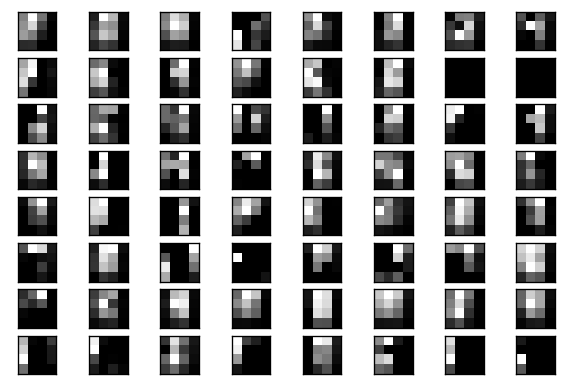

In [4]:
img_path = f'feats/1/IC0109W0479_uo2_1.46.jpg'
img = load_img(img_path, color_mode="grayscale")
img = np.expand_dims(np.asarray(img), axis=0)
img = np.expand_dims(np.asarray(img), axis=3)
feature_maps = submodel.predict(img)

square = 8  # sample 64 filters
i = 1
for _ in range(square):
    for _ in range(square):
        ax = plt.subplot(square, square, i)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, i - 1], cmap='gray')
        i += 1
# show the figure
plt.show()
plt.close('all')